In [1]:
#importing all libraries
import pandas as pd
import numpy as np

#preprocessing & model selection
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler

#regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

#evvauation
from sklearn.metrics import(
    mean_squared_error,
    mean_absolute_error,
    r2_score
)
#plotting
import matplotlib.pyplot as plt
import seaborn as sns

#mount with drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# load&inspect

In [3]:
file_path = '/content/drive/MyDrive/MYOWN_Colab Notebooks/Salary Data.csv'
df = pd.read_csv(file_path)

print(df.shape)
display(df.head())
print(df.info())
print(df.isnull().sum())

(375, 6)


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB
None
Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


In [4]:
#basic cleaning
df = df.dropna()
print(df.shape)

(373, 6)


In [5]:
#encode features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
  df[col] = le.fit_transform(df[col])

print("After encoding, dtypes:\n", df.dtypes)

After encoding, dtypes:
 Age                    float64
Gender                   int64
Education Level          int64
Job Title                int64
Years of Experience    float64
Salary                 float64
dtype: object


# define feature & target

In [6]:
target = 'Salary'
X = df.drop(columns=target)
y= df[target]
print(X.shape)
print(y.describe())

(373, 5)
count       373.000000
mean     100577.345845
std       48240.013482
min         350.000000
25%       55000.000000
50%       95000.000000
75%      140000.000000
max      250000.000000
Name: Salary, dtype: float64


In [10]:
#train/test
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.3,
    random_state = 42

)
print(X_train.shape, X_test.shape)

print(X_train.shape, X_test.shape)

(261, 5) (112, 5)
(261, 5) (112, 5)


# scalling

In [11]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns
)


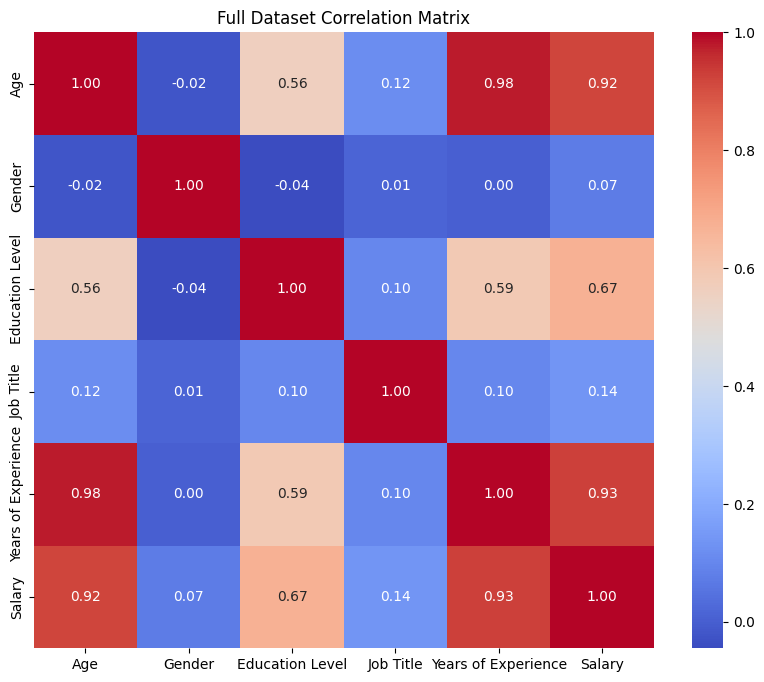

In [12]:
#correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Full Dataset Correlation Matrix")
plt.show()

# train regression

In [15]:
models ={
    'LinearRegression' : LinearRegression(),
    'SVR': SVR(kernel='rbf')
}


for name, mdl in models.items():
    mdl.fit(X_train_scaled, y_train)
    print(f" {name} trained")


for name, mdl in models.items():
    mdl.fit(X_train_scaled, y_train)
    print(f" {name} trained")


 LinearRegression trained
 SVR trained
 LinearRegression trained
 SVR trained


# evaluation

In [17]:
results ={}
for name, mdl in models.items():
  X_eval=X_test_scaled
  y_pred=mdl.predict(X_eval)

  mse = mean_squared_error(y_test,y_pred)
  rmse = np.sqrt(mse)
  mae =mean_absolute_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)

  results[name] ={
      'MSE': mse,
      'RMSE': rmse,
      'MAE': mae,
      'R2': r2
  }
  print(f"\n{name} Performance:")
  print(f"  • MSE:  {mse:.2f}")
  print(f"  • RMSE: {rmse:.2f}")
  print(f"  • MAE:  {mae:.2f}")
  print(f"  • R²:   {r2:.2f}")

# summary table
pd.DataFrame(results).T





LinearRegression Performance:
  • MSE:  252493731.92
  • RMSE: 15890.05
  • MAE:  11377.18
  • R²:   0.89

SVR Performance:
  • MSE:  2290290935.77
  • RMSE: 47856.98
  • MAE:  39300.77
  • R²:   -0.01


,MSE,RMSE,MAE,R2
LinearRegression,2.524937e+08,15890.05135,11377.183127,0.888213
SVR,2.290291e+09,47856.98419,39300.773849,-0.013988


# 5fold cross validation

In [22]:
cv_metrics = {}
for name,mdl in models.items():
    neg_mse = cross_val_score(
        mdl, X_train_scaled,y_train, cv=5, scoring = 'neg_mean_squared_error'
    )
    r2 = cross_val_score(
         mdl, X_train_scaled, y_train,
            cv=5, scoring='r2'
    )
    cv_metrics[name] = {
            'Avg_RMSE': np.sqrt(-neg_mse).mean(),
            'Avg_R2': r2.mean()
        }

pd.DataFrame(cv_metrics).T


,Avg_RMSE,Avg_R2
LinearRegression,15569.744380,0.893867
SVR,48805.322313,-0.048532
